In [3]:
import pandas as pd
import numpy as np
import joblib
from rdkit.Chem import AllChem
from rdkit import Chem
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [4]:
element_properties = {
    'P': {
        'group_number': 15,
        'period_number': 3,
        'electronegativity': 2.19,
        'first_ionization_energy': 1011.8, #kJ/mol
        'electron_affinity': 72, #kJ/mol
        'density': 1.823, #g/cm3
        'weight': 30.97,
        'melting_point': 317.3,
        'boiling_point': 553.7,
    },
    'Fe': {
        'group_number': 8,
        'period_number': 4,
        'electronegativity': 1.83,
        'first_ionization_energy': 762.5, #kJ/mol
        'electron_affinity': 15.7, #kJ/mol
        'density': 7.874, #g/cm3
        'weight': 55.845,
        'melting_point': 1811,
        'boiling_point': 3134,
    },
    'Rh': {
        'group_number': 9,
        'period_number': 5,
        'electronegativity': 2.28,
        'first_ionization_energy': 719.7, #kJ/mol
        'electron_affinity': 109.7, #kJ/mol
        'density': 12.41, #g/cm3
        'weight': 102.905,
        'melting_point': 2237,
        'boiling_point': 3968,
    },
    'Mn': {
        'group_number': 7,
        'period_number': 4,
        'electronegativity': 1.55,
        'first_ionization_energy': 717.3, #kJ/mol
        'electron_affinity': 0, #kJ/mol
        'density': 7.21, #g/cm3
        'weight': 54.938,
        'melting_point': 1519,
        'boiling_point': 2334,
    },
    'Co': {
        'group_number': 9,
        'period_number': 4,
        'electronegativity': 1.88,
        'first_ionization_energy': 760.4, #kJ/mol
        'electron_affinity': 63.7, #kJ/mol
        'density': 8.90, #g/cm3
        'weight': 58.933,
        'melting_point': 1768,
        'boiling_point': 3200,
    },
    'Ni': {
        'group_number': 10,
        'period_number': 4,
        'electronegativity': 1.91,
        'first_ionization_energy': 737.1, #kJ/mol
        'electron_affinity': 112, #kJ/mol
        'density': 8.90,
        'weight': 58.69,
        'melting_point': 1728,
        'boiling_point': 3186,
    },
    "W":{
        'group_number': 6,
        'period_number': 6,
        'electronegativity': 2.36,
        'first_ionization_energy': 770.1, #kJ/mol
        'electron_affinity': 78.6, #kJ/mol
        'density': 19.25,
        'weight': 183.84,
        'melting_point': 3422, #도
        'boiling_point': 5930, #
    },
    "Ir":{
        'group_number': 9,
        'period_number': 6,
        'electronegativity': 2.2,
        'first_ionization_energy': 880, #kJ/mol
        'electron_affinity': 151, #kJ/mol
        'density': 22.5622, #g/cm3
        'weight': 192.217,
        'melting_point': 2446,
        'boiling_point': 4130,
    },
    "Sn":{
        'group_number': 14,
        'period_number': 5,
        'electronegativity': 1.96,
        'first_ionization_energy': 708.58, #kJ/mol
        'electron_affinity': 107.3, #kJ/mol
        'density': 7.289,
        'weight': 118.71,
        'melting_point': 231.93,
        'boiling_point': 2602,
    }
    ,
    "Te":{
        'group_number': 16,
        'period_number': 5,
        'electronegativity': 2.1,
        'first_ionization_energy': 869, #kJ/mol
        'electron_affinity': 190.2, #kJ/mol
        'density': 6.24,
        'weight': 118.71,
        'melting_point': 450,
        'boiling_point': 988,
    },
    "Pb":{
        'group_number': 14,
        'period_number': 6,
        'electronegativity': 2.33,
        'first_ionization_energy': 715.6, #kJ/mol
        'electron_affinity': 35.1, #kJ/mol
        'density': 11.34,
        'weight': 207.2,
        'melting_point': 327.6,
        'boiling_point': 1749,
    }
    ,
    "Pd":{
        'group_number': 10,
        'period_number': 5,
        'electronegativity': 2.2,
        'first_ionization_energy': 804.4, #kJ/mol
        'electron_affinity': 53.7, #kJ/mol
        'density': 12.023,
        'weight': 106.42,
        'melting_point': 1555,
        'boiling_point': 2963,
    },
    "Cu":{
        'group_number': 11,
        'period_number': 4,
        'electronegativity': 1.9,
        'first_ionization_energy': 745.5, #kJ/mol
        'electron_affinity': 118.4, #kJ/mol
        'density': 8.935,
        'weight': 63.546,
        'melting_point': 1084.62,
        'boiling_point': 1984.32,
    }
    ,
    "Au":{
        'group_number': 11,
        'period_number': 6,
        'electronegativity': 2.54,
        'first_ionization_energy': 890.1, #kJ/mol
        'electron_affinity': 222.8, #kJ/mol
        'density': 19.283,
        'weight': 196.96657,
        'melting_point': 1064.18,
        'boiling_point': 2970,
    },
    "Sb":{
        'group_number': 15,
        'period_number': 5,
        'electronegativity': 2.05,
        'first_ionization_energy': 834, #kJ/mol
        'electron_affinity': 103.2, #kJ/mol
        'density': 6.697,
        'weight': 121.76,
        'melting_point': 630.78,
        'boiling_point': 1587,
    },
    "Ru":{
        'group_number': 8,
        'period_number': 5,
        'electronegativity': 2.2,
        'first_ionization_energy': 710.2, #kJ/mol
        'electron_affinity': 101.3, #kJ/mol
        'density': 12.2,
        'weight': 101.07,
        'melting_point': 2250,
        'boiling_point': 4150,
    }
    ,
    "-":{
        'group_number': 0,
        'period_number': 0,
        'electronegativity': 0,
        'first_ionization_energy': 0, #kJ/mol
        'electron_affinity': 0, #kJ/mol
        'density': 0,
        'weight': 0,
        'melting_point': 0,
        'boiling_point': 0,
    },
    np.nan:{
        'group_number': 0,
        'period_number': 0,
        'electronegativity': 0,
        'first_ionization_energy': 0, #kJ/mol
        'electron_affinity': 0, #kJ/mol
        'density': 0,
        'weight': 0,
        'melting_point': 0,
        'boiling_point': 0,
    },
}

def get_element_properties(symbol):
    properties = element_properties.get(symbol)
    if not properties:
        return f"No data available for element: {symbol}"
    return properties

def set_hetero_desc(df):
    hetero_desc_df = pd.DataFrame()
    for hetero in df["Hetero"]:
        hetero_desc_df = pd.concat([hetero_desc_df,pd.DataFrame.from_dict(get_element_properties(hetero), orient='index').T],axis=0)
    hetero_desc_df.index = range(len(hetero_desc_df))
    df = pd.concat([df.drop(["Hetero"],axis=1),hetero_desc_df],axis=1)
    return df

def process_ratio(ratio):
    if ratio == '-':
        return 0
    else:
        try:
            left, right = ratio.split(':')
            return float(right) / (float(left)+float(right))
        except:
            return ratio

In [5]:
data = pd.read_csv("Tafel_dataset.csv").drop(["idx"],axis=1)

# Select 1 sigma data

In [6]:
mu = 84.8
std = 35.4
i = 10
lower_bound = mu-i*std*0.1
upper_bound = mu+i*std*0.1
data = data[((data["SPt/C"] >= lower_bound)&(data["SPt/C"] <= upper_bound))]
data.index = range(len(data))
print(len(data), lower_bound, upper_bound)

42 49.4 120.19999999999999


In [7]:
data = data.drop(["Pt/C","reported_tafel","SPt/C"],axis=1)
data["tot_size"] = data["tot_size"].astype(float)
data["sub_size"] = data["sub_size"].astype(float)
data['ratio'] = data['ratio'].apply(process_ratio)
data = set_hetero_desc(data)

In [8]:
data["concen"] = 0
data["el"] = "KOH"
for i,j in enumerate(data["electrolyte"]):
    data.loc[i,"concen"] = float(j.split(" ")[0][:3])
    if j.split(" ")[1] == "M":
        data.loc[i,"el"] = j.split(" ")[2]
    else:
        data.loc[i,"el"] = j.split(" ")[1]
data = data.drop(["name","electrolyte"],axis=1)

/tmp/87.1.a100.q/ipykernel_1803463/2217952559.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,"concen"] = float(j.split(" ")[0][:3])


In [9]:
label_encoders = joblib.load('label_encoder.pkl')
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = label_encoders[column]
    data[column] = le.transform(data[column].astype(str))

In [11]:
rf = joblib.load('rf_1sigma.pkl')

import joblib
joblib.dump(le, "label_encoder_1204.pkl")

# Random Forest

In [12]:
X = data.drop(['label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16015)

(0.0, 160.0)

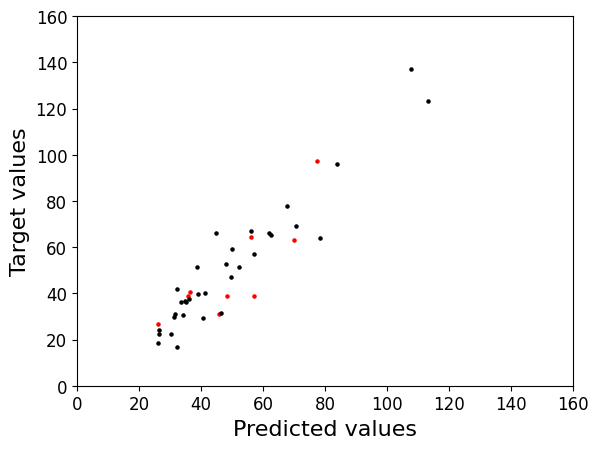

In [15]:

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
plt.scatter(y_test_pred_rf, y_test, c='r', s=5)
plt.scatter(y_train_pred_rf, y_train, c='k', s=5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Target values", fontsize=16)
plt.xlabel("Predicted values", fontsize=16)
plt.xlim([0,160])
plt.ylim([0,160])

In [17]:
mae = mean_absolute_error(y_train, y_train_pred_rf)
r2 = pearsonr(np.array(y_train), np.array(y_train_pred_rf))#.statistic
print(mae, r2)
mae = mean_absolute_error(y_test, y_test_pred_rf)
r2 = pearsonr(y_test, y_test_pred_rf)#.statistic
print(mae, r2)

7.141046638090909 PearsonRResult(statistic=0.949695242162589, pvalue=3.49283203773493e-17)
9.35601615411111 PearsonRResult(statistic=0.8501072237868678, pvalue=0.003695923683180291)
